In [4]:
# !pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
downloaded = drive.CreateFile({'id':'1-Hh3pdJlxhHWy42ZqXFDdjjBxe4vhoRg'})
downloaded.GetContentFile('train.csv') 

dowm1 = drive.CreateFile({'id':'1uJ9jU4cLMl9LQwKt_N4TsIgBn9RbOgTD'})
dowm1.GetContentFile('glove.twitter.27B.50d.txt') 

In [3]:
import json
import keras
import pandas as pd
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, Activation, Embedding
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import json
from keras.models import model_from_json

# Import libraries
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
# nltk.download()
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

import string
import re

In [4]:
data = pd.read_csv('./nlp-getting-started/train.csv', encoding='utf-8')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
#### removing entries where location values are missing
data_after_null_removal = data.copy()

#punctutation removal
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data_afer_punctuation_removal = data_after_null_removal.copy()
data_afer_punctuation_removal['text'] = data_afer_punctuation_removal['text'].apply(lambda x: clean_text(x))
data_afer_punctuation_removal.head(10)

# Tockenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data_afer_punctuation_removal.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

# stopword removal 
data_after_stopword_removal = tockenized_data.copy()
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

data_after_stopword_removal['text'] = data_after_stopword_removal['text'].apply(lambda x: remove_stopwords(x))

# return to string
data_without_tockenization = data_after_stopword_removal.copy()
def listToString(s):     
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: listToString(x))
data_without_tockenization

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearby homes,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires california even northern part state troubling,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,police investigating ebike collided car little portugal ebike rider suffered serious nonlife thr...,1


In [6]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

In [7]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.1, random_state=42, shuffle=True)

# Word2Vec

In [8]:
from gensim.models import Word2Vec, KeyedVectors

In [9]:
data2 = data_without_tockenization.copy()

In [10]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

In [11]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.1, random_state=42, shuffle=True)

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=3000)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test  = tokenizer.texts_to_sequences(sentences_test)

In [16]:
max_length = max([len(s.split()) for s in sentences])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test =pad_sequences(X_test, maxlen=max_length, padding='post')
print(max_length)

23


In [256]:

def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data2.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

tockenized_data.head()

tweet_data = tockenized_data['text']
tweet_data[1]

tweet_data_array = []

for arr in tweet_data:
    tweet_data_array.append(arr)

In [257]:
# train word2vec model
model = Word2Vec(sentences=tweet_data_array, size=100, window=5, workers=3, min_count=1,
                 negative=20, iter=100,seed=1000,sg=0)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec100iterCBOW.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [258]:
# load embedding as a dict
def load_embedding(filename):
# load embedding into memory, skip first line
    file = open(filename,'r')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding

In [259]:
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

In [260]:

# load embedding from file
raw_embedding = load_embedding('embedding_word2vec100iterCBOW.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [261]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 23, 100)           1539700   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 1,540,721
Trainable params: 1,021
Non-trainable params: 1,539,700
_________________________________________________________________


In [262]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 1s 2ms/step - loss: 0.6202 - accuracy: 0.6759 - precision: 0.6322 - recall: 0.5754 - val_loss: 0.5821 - val_accuracy: 0.6924 - val_precision: 0.6566 - val_recall: 0.6414
Epoch 2/50
386/386 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7312 - precision: 0.6973 - recall: 0.6541 - val_loss: 0.5614 - val_accuracy: 0.7201 - val_precision: 0.7000 - val_recall: 0.6447
Epoch 3/50
386/386 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7491 - precision: 0.7175 - recall: 0.6796 - val_loss: 0.5567 - val_accuracy: 0.7157 - val_precision: 0.6708 - val_recall: 0.7039
Epoch 4/50
386/386 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.7554 - precision: 0.7282 - recall: 0.6811 - val_loss: 0.5463 - val_accuracy: 0.7318 - val_precision: 0.7143 - val_recall: 0.6579
Epoch 5/50
386/386 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.7599 - pr

In [64]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,318,108
Positive,98,238


In [65]:
results

,Value
Accuracy,0.729659
Precision,0.687861
FPR,0.253521
Recall,0.708333
F1,0.697947


## SimpleRNN+word2vec

In [110]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

In [111]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.1, random_state=42, shuffle=True)

In [112]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test  = tokenizer.texts_to_sequences(sentences_test)

In [113]:
max_length = max([len(s.split()) for s in sentences])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test =pad_sequences(X_test, maxlen=max_length, padding='post')

In [114]:

# load embedding from file
raw_embedding = load_embedding('embedding_word2vec100iterCBOW.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [115]:
from keras import layers
from keras.layers import Dense,Dropout,Embedding,LSTM,SpatialDropout1D,Bidirectional

model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.25))
model.add(SimpleRNN(128,return_sequences=True))
model.add(SimpleRNN(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 23, 100)           1539700   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 23, 100)           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 23, 128)           29312     
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 1,581,429
Trainable params: 41,729
Non-trainable params: 1,539,700
_______________________________________

In [169]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=32,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Epoch 1/100
193/193 [==============================] - 3s 17ms/step - loss: 0.4071 - accuracy: 0.8266 - val_loss: 0.5180 - val_accuracy: 0.7784
Epoch 2/100
193/193 [==============================] - 3s 16ms/step - loss: 0.4006 - accuracy: 0.8285 - val_loss: 0.5154 - val_accuracy: 0.7741
Epoch 3/100
193/193 [==============================] - 3s 17ms/step - loss: 0.4049 - accuracy: 0.8284 - val_loss: 0.5122 - val_accuracy: 0.7843
Epoch 4/100
193/193 [==============================] - 3s 16ms/step - loss: 0.4134 - accuracy: 0.8208 - val_loss: 0.5498 - val_accuracy: 0.7711
Epoch 5/100
193/193 [==============================] - 3s 16ms/step - loss: 0.4156 - accuracy: 0.8251 - val_loss: 0.5146 - val_accuracy: 0.7755
Epoch 6/100
193/193 [==============================] - 3s 17ms/step - loss: 0.4139 - accuracy: 0.8225 - val_loss: 0.5355 - val_accuracy: 0.7726
Epoch 7/100
193/193 [==============================] - 3s 16ms/step - loss: 0.4121 - accuracy: 0.8225 - val_loss: 0.5313 - val_accuracy:

In [170]:
model_w2vRNN = model.to_json()
with open('word2vec_RNN_model.json', 'w') as json_file:
    json_file.write(model_w2vRNN)

model.save_weights('word2vec_RNN_model.h5')

print('saved model!')

saved model!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


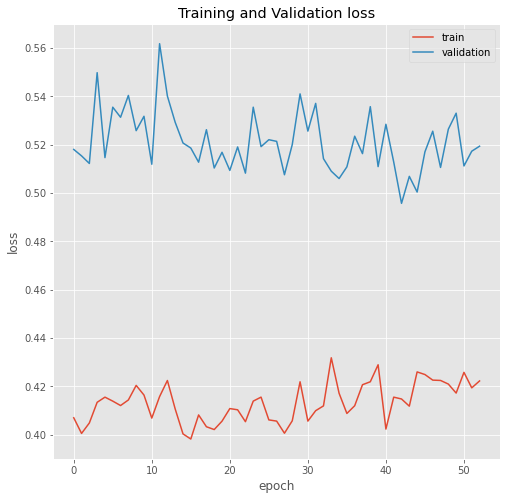

In [171]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [172]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,366,60
Positive,120,216


In [173]:
results

,Value
Accuracy,0.763780
Precision,0.782609
FPR,0.140845
Recall,0.642857
F1,0.705882


## LSTM + WORD2VEC

In [208]:
from keras import layers
from keras.layers import Dense,Dropout,Embedding,LSTM,SpatialDropout1D,Bidirectional

model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.25))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 23, 100)           1539700   
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 23, 100)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 23, 128)           117248    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 1,706,421
Trainable params: 166,721
Non-trainable params: 1,539,700
_____________________________________

In [209]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=64,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

Epoch 1/50
97/97 [==============================] - 8s 82ms/step - loss: 0.5360 - accuracy: 0.7497 - val_loss: 0.4994 - val_accuracy: 0.7638
Epoch 2/50
97/97 [==============================] - 7s 75ms/step - loss: 0.4798 - accuracy: 0.7870 - val_loss: 0.4741 - val_accuracy: 0.7813
Epoch 3/50
97/97 [==============================] - 7s 74ms/step - loss: 0.4498 - accuracy: 0.7992 - val_loss: 0.4774 - val_accuracy: 0.7726
Epoch 4/50
97/97 [==============================] - 7s 75ms/step - loss: 0.4367 - accuracy: 0.8096 - val_loss: 0.4567 - val_accuracy: 0.7828
Epoch 5/50
97/97 [==============================] - 7s 75ms/step - loss: 0.4199 - accuracy: 0.8128 - val_loss: 0.4584 - val_accuracy: 0.7799
Epoch 6/50
97/97 [==============================] - 7s 75ms/step - loss: 0.4049 - accuracy: 0.8219 - val_loss: 0.4845 - val_accuracy: 0.7828
Epoch 7/50
97/97 [==============================] - 7s 75ms/step - loss: 0.3816 - accuracy: 0.8331 - val_loss: 0.4976 - val_accuracy: 0.7901
Epoch 00007: 

In [210]:
model_w2vRNN = model.to_json()
with open('word2vec_LSTM_model.json', 'w') as json_file:
    json_file.write(model_w2vRNN)

model.save_weights('word2vec_LSTM_model.h5')

print('saved model!')

saved model!


In [211]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,395,31
Positive,124,212


In [212]:
results

,Value
Accuracy,0.796588
Precision,0.872428
FPR,0.072770
Recall,0.630952
F1,0.732297


## Bi Directional LSTM + Word2Vec

In [245]:
from keras import layers
from keras.layers import Dense,Dropout,Embedding,LSTM,SpatialDropout1D,Bidirectional

model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 23, 100)           1539700   
_________________________________________________________________
spatial_dropout1d_17 (Spatia (None, 23, 100)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 23, 256)           234496    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 1,938,677
Trainable params: 398,977
Non-trainable params: 1,539,700
_____________________________________

In [246]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=32,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

Epoch 1/50
193/193 [==============================] - 20s 103ms/step - loss: 0.5118 - accuracy: 0.7629 - val_loss: 0.4812 - val_accuracy: 0.7843
Epoch 2/50
193/193 [==============================] - 18s 95ms/step - loss: 0.4593 - accuracy: 0.7851 - val_loss: 0.4736 - val_accuracy: 0.7770
Epoch 3/50
193/193 [==============================] - 18s 95ms/step - loss: 0.4303 - accuracy: 0.8125 - val_loss: 0.4820 - val_accuracy: 0.7857
Epoch 4/50
193/193 [==============================] - 19s 96ms/step - loss: 0.4078 - accuracy: 0.8250 - val_loss: 0.4692 - val_accuracy: 0.7799
Epoch 5/50
193/193 [==============================] - 18s 96ms/step - loss: 0.3883 - accuracy: 0.8298 - val_loss: 0.4662 - val_accuracy: 0.7872
Epoch 6/50
193/193 [==============================] - 18s 96ms/step - loss: 0.3630 - accuracy: 0.8480 - val_loss: 0.4913 - val_accuracy: 0.7755
Epoch 7/50
193/193 [==============================] - 19s 96ms/step - loss: 0.3415 - accuracy: 0.8547 - val_loss: 0.4882 - val_accuracy

In [247]:
model_w2vRNN = model.to_json()
with open('word2vec_BLSTM_model.json', 'w') as json_file:
    json_file.write(model_w2vRNN)

model.save_weights('word2vec_BLSTM_model.h5')

print('saved model!')

saved model!


In [248]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,371,55
Positive,116,220


In [249]:
results

,Value
Accuracy,0.775591
Precision,0.800000
FPR,0.129108
Recall,0.654762
F1,0.720131
